In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import re
import random
import pickle
import unicodedata
import emoji
from sys import argv
from time import time,sleep
from scipy import sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from nltk import RegexpTokenizer

import geopandas as gpd
import descartes

import urlmarker
from html import unescape

In [31]:
df=pd.read_csv('cleanTweets_pred_prob_BJP_CONG.csv',na_values={'None','NONE'})

df=df.replace(r'^\s*$', np.nan, regex=True)
df=df.fillna('')

In [7]:
df['created_at']

0         2019-05-24 12:01:09
1         2019-05-25 15:18:09
2         2019-05-25 14:27:43
3         2019-05-23 03:06:57
4         2019-05-24 07:16:55
                 ...         
398744    2019-05-23 02:50:00
398745    2019-05-24 10:40:00
398746    2019-05-24 17:53:56
398747    2019-05-23 10:13:30
398748    2019-05-25 12:14:34
Name: created_at, Length: 398749, dtype: object

In [37]:
from datetime import datetime, timedelta
from dateutil import parser

def f_date(arg):#extracting date from datetime 
    
    obj_dt = datetime.strptime(arg['created_at'],'%Y-%m-%d %H:%M:%S')
    return str(obj_dt.date())

df['date']=df.apply(f_date,axis=1)#assigning date to each tweet

In [33]:
df_bjp=df.loc[df.index[df['bjp']==1]].copy()
df_congress=df.loc[df.index[df['congress']==1]].copy()

df_bjp=df_bjp.reset_index(drop=True)
df_congress=df_congress.reset_index(drop=True)

df=df.loc[df.index[ (df['bjp'] + df['congress'])!=0 ]] #retain only tweets which are either bjp or congress related

In [29]:
df['date']

0         2019-05-24
1         2019-05-25
2         2019-05-25
3         2019-05-23
4         2019-05-24
             ...    
398744    2019-05-23
398745    2019-05-24
398746    2019-05-24
398747    2019-05-23
398748    2019-05-25
Name: date, Length: 398749, dtype: object

In [34]:
list_date=['2019-05-23','2019-05-24','2019-05-25','2019-05-26']
l1=[]
l2=[]
l3=[]

for e in list_date:
    l=len(df.loc[df.index[df['date']==e]])
    
    #d=df_bjp.loc[df_bjp.index[df_bjp['date']==e]].copy()#get all bjp related tweets on give date 
    d=df_congress.loc[df_congress.index[df_congress['date']==e]].copy()#get all congress related tweets on given date
    
    #here l1,l2 and l3 are sentiment intensities (for positive, negative and neutral resptv) per date
    l1.append(len(d.loc[d.index[d['pred']=='pos']])/l)
    l2.append(len(d.loc[d.index[d['pred']=='neg']])/l)
    l3.append(len(d.loc[d.index[d['pred']=='Rneu']])/l)
    
    
    
df_date=pd.DataFrame(data={'date':list_date,'pos':l1,'neg':l2,'neu':l3})


In [35]:
df_date

,date,pos,neg,neu
0,2019-05-23,0.042486,0.167917,0.041385
1,2019-05-24,0.047877,0.231641,0.025857
2,2019-05-25,0.043598,0.332158,0.039862
3,2019-05-26,0.033285,0.303312,0.020264


[737202. 737203. 737204. 737205.]


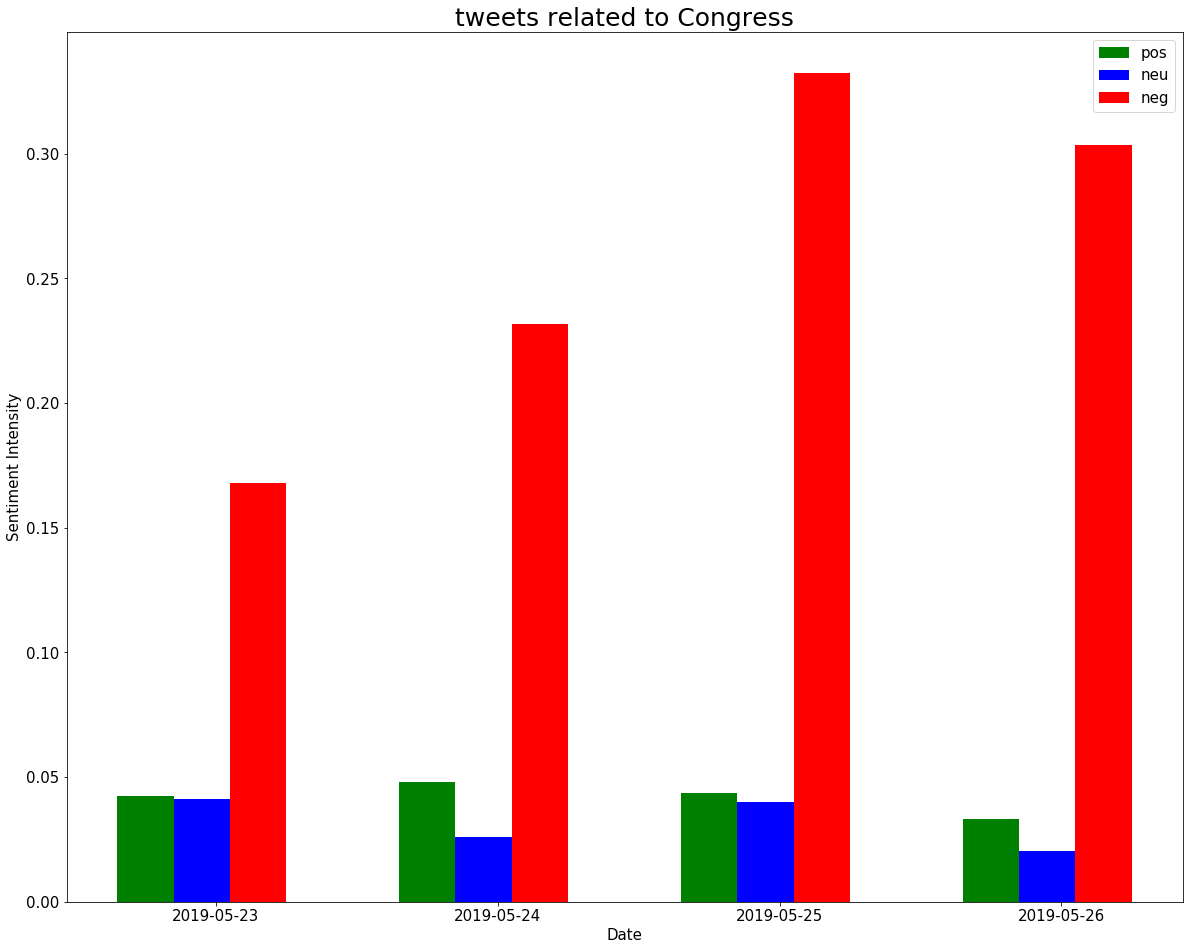

In [36]:
from matplotlib.dates import date2num
from datetime import datetime, timedelta
plt.rcParams['figure.figsize']=(10,8)
plt.rcParams.update({'font.size': 15})

def f_date2(arg):#extracting date from datetime 
    
    obj_dt = datetime.strptime(arg,'%Y-%m-%d')
    return (obj_dt.date())


x=list(map(f_date2,list_date))

x = date2num(x)
print(x)
fig, ax = plt.subplots(1, figsize=(20, 16))
#fig, ax = plt.subplot(111)
ax.set_title('tweets related to Congress', fontdict={'fontsize': '25', 'fontweight' : '3'})
A=ax.bar(x-0.2, df_date['pos'], width=0.2, color='g', align='center')
B=ax.bar(x, df_date['neu'], width=0.2, color='b', align='center')
C=ax.bar(x+0.2, df_date['neg'], width=0.2, color='r', align='center')

ax.set_ylabel('Sentiment Intensity')
ax.set_xlabel('Date')
ax.set_xticks(x+0.05)
ax.set_xticklabels( list_date )
ax.legend( (A,B,C), ('pos','neu','neg') )


plt.show()

fig.savefig('SentVsDate_CONG.png', dpi=300)